# 📌 **K-Nearest Neighbors (KNN) - Teoria e Implementazione**
---
## 📌 **1. Introduzione al KNN**
Il **K-Nearest Neighbors (KNN)** è un algoritmo di **Machine Learning supervisionato** utilizzato sia per **classificazione** che per **regressione**. Si basa sull’idea che **gli oggetti simili tendono a stare vicini nello spazio delle caratteristiche**.

### 📍 **Concetto Base**
- Il modello **non apprende una funzione esplicita**, ma **memorizza** i dati di addestramento.
- Per fare una previsione su un nuovo punto, KNN:
  1. Calcola la distanza tra il nuovo punto e tutti i punti del dataset.
  2. Seleziona i **k** punti più vicini.
  3. Restituisce la **classe più frequente** tra questi (per la classificazione) o la media (per la regressione).

---

## 📌 **2. Funzionamento di KNN**
### 🔹 **Passaggi Principali**
1. **Scelta di \( k \)** (numero di vicini considerati)
2. **Misurazione della distanza** (ad esempio, distanza Euclidea)
3. **Assegnazione della classe** in base ai vicini più prossimi

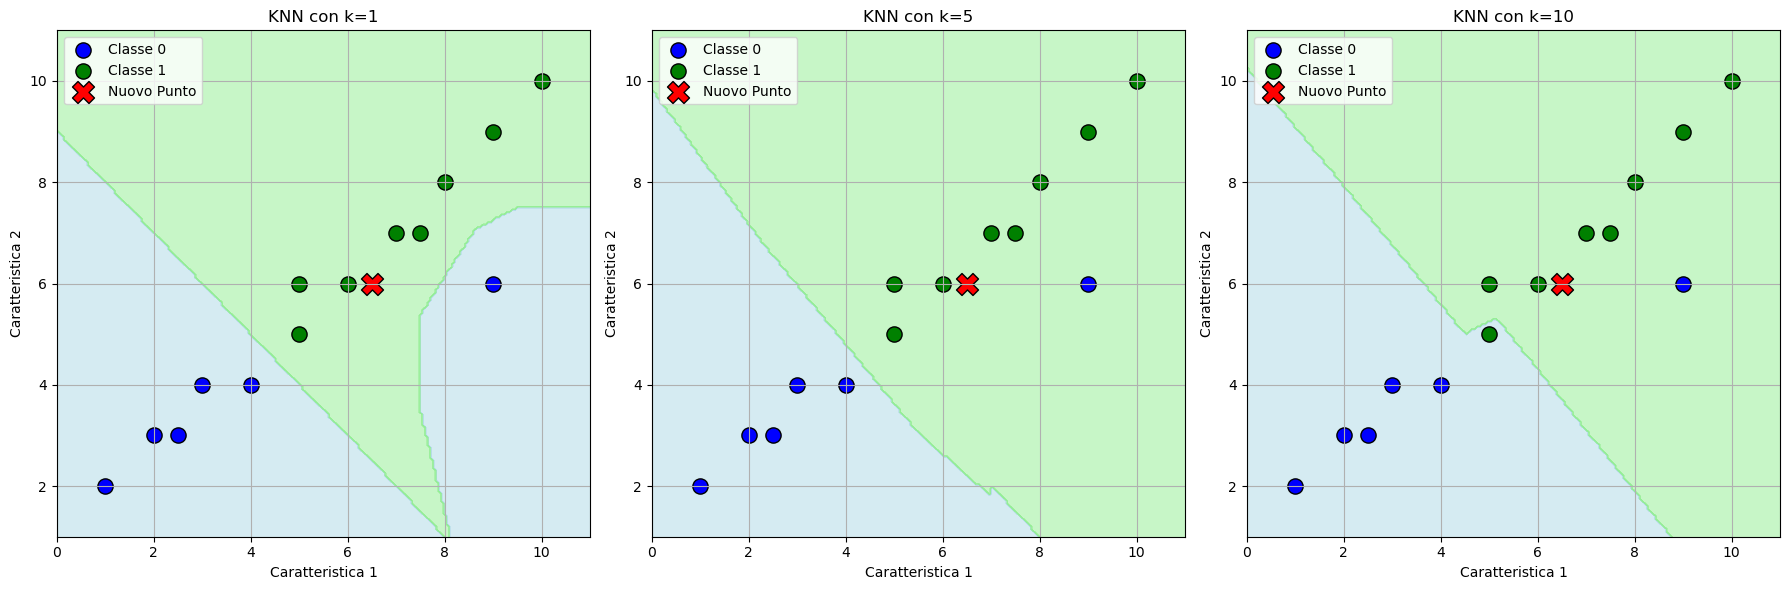

In [97]:
# 📌 Generiamo un dataset con più punti e una distribuzione più ampia

# Creiamo un dataset più vario
X = np.array([[1,2], [2,3], [2.5,3], [3,4], [4,4], [5,5], [5,6], [6,6], [7,7], [7.5,7], [8,8], [9,9], [9,6], [10,10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])  # Più punti distribuiti tra le classi
new_point = np.array([[6.5, 6]])  # Nuovo punto da classificare

# Creiamo il meshgrid per visualizzare le regioni di decisione
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# 📌 Proviamo diversi valori di k per vedere come cambia la decisione
k_values = [1, 5, 10]

fig, axes = plt.subplots(1, len(k_values), figsize=(18, 6))

for idx, k in enumerate(k_values):
    ax = axes[idx]

    # Addestriamo il modello KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Predizione su tutto il meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Definiamo i colori per le classi
    cmap_background = ListedColormap(['lightblue', 'lightgreen'])
    cmap_points = ['blue', 'green']

    # Plottiamo le regioni di decisione
    ax.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)

    # Plottiamo i punti di training
    for class_idx in np.unique(y):
        ax.scatter(X[y == class_idx][:, 0], X[y == class_idx][:, 1], 
                   color=cmap_points[class_idx], edgecolor='black', s=120, label=f"Classe {class_idx}")

    # Plottiamo il nuovo punto da classificare
    ax.scatter(new_point[0, 0], new_point[0, 1], color='red', s=250, edgecolor='black', marker='X', label="Nuovo Punto")

    ax.set_title(f"KNN con k={k}")
    ax.set_xlabel("Caratteristica 1")
    ax.set_ylabel("Caratteristica 2")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Nel diagramma sopra:
- Il **punto rosso** è quello da classificare.
- I cerchi attorno mostrano i **k vicini più vicini**.
- Se \( k = 3 \), il nuovo punto sarebbe classificato come **blu**.
- Se \( k = 5 \), il nuovo punto sarebbe classificato come **verde**.

---

## 📌 **3. Scelta del Valore di \( k \)**
Il parametro \( k \) è **fondamentale** per il buon funzionamento dell’algoritmo:

- **Se \( k \) è troppo piccolo** → Sensibile ai **rumori** nei dati, rischio di overfitting.
- **Se \( k \) è troppo grande** → Rischio di perdere dettagli, più influenzato dai dati lontani.

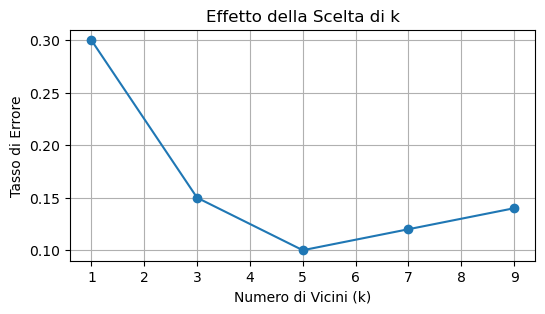

In [21]:
# 2️⃣ Effetto della scelta di k
plt.figure(figsize=(6,3))
ks = [1, 3, 5, 7, 9]
errors = [0.30, 0.15, 0.10, 0.12, 0.14]

plt.plot(ks, errors, marker='o', linestyle='-')
plt.xlabel("Numero di Vicini (k)")
plt.ylabel("Tasso di Errore")
plt.title("Effetto della Scelta di k")
plt.grid(True)
plt.savefig("knn_k_effect.png", dpi=300)
plt.show()

🔹 **Strategia consigliata**:  
- Provare diversi valori di \( k \) e valutare la performance (cross-validation).
- Usare un valore dispari per evitare pareggi nelle votazioni.

---

## 📌 **4. Distanze Utilizzate in KNN**
Per trovare i **k vicini più vicini**, possiamo usare diverse **misure di distanza**:

1. **Distanza Euclidea** (più usata):  
   $$ d(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2} $$ 
   Questa distanza è adatta quando i dati sono **continui** e ben normalizzati.

2. **Distanza di Manhattan** (utile per dati con assi ortogonali):  
   $$ d(A, B) = \sum_{i=1}^{n} |A_i - B_i| $$  

3. **Distanza di Minkowski** (generalizzazione di Euclidea e Manhattan):  
  $$ d(A, B) = \left( \sum_{i=1}^{n} |A_i - B_i|^p \right)^{\frac{1}{p}} $$
   - Se \( p = 1 \) → Distanza di Manhattan.
   - Se \( p = 2 \) → Distanza Euclidea.

### 🔹 **Effetto delle Distanze sui Dati**

C:\Users\mbagn\AppData\Local\Temp\ipykernel_26524\2574828655.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([A[0], C[0]], [A[1], C[1]], 'r-', linestyle="dashed", label="Distanza Manhattan 1")
C:\Users\mbagn\AppData\Local\Temp\ipykernel_26524\2574828655.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([C[0], B[0]], [C[1], B[1]], 'r-', linestyle="dashed", label="Distanza Manhattan 2")


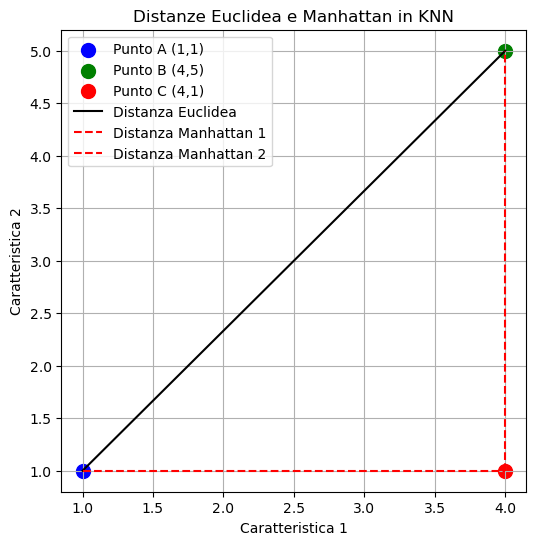

In [35]:
plt.figure(figsize=(6,6))

# Definiamo 3 punti
A = np.array([1, 1])
B = np.array([4, 5])
C = np.array([4, 1])

# Plottiamo i punti
plt.scatter(A[0], A[1], color="blue", s=100, label="Punto A (1,1)")
plt.scatter(B[0], B[1], color="green", s=100, label="Punto B (4,5)")
plt.scatter(C[0], C[1], color="red", s=100, label="Punto C (4,1)")

# Linee per le distanze
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-', label="Distanza Euclidea")
plt.plot([A[0], C[0]], [A[1], C[1]], 'r-', linestyle="dashed", label="Distanza Manhattan 1")
plt.plot([C[0], B[0]], [C[1], B[1]], 'r-', linestyle="dashed", label="Distanza Manhattan 2")

# Labels
plt.xlabel("Caratteristica 1")
plt.ylabel("Caratteristica 2")
plt.title("Distanze Euclidea e Manhattan in KNN")
plt.legend()
plt.grid(True)
plt.savefig("knn_distances.png", dpi=300)
plt.show()

## 📌 **5. Preparazione dei Dati per KNN**
Per garantire buone prestazioni di KNN, è essenziale **preparare bene i dati**.

### **✅ Cosa fare prima di applicare KNN?**
1. **Rimuovere valori mancanti** → Usare metodi di imputation se necessario.
2. **Standardizzare le caratteristiche** → KNN è basato sulla distanza, quindi variabili con scale diverse possono distorcere il risultato.
   - Usare **StandardScaler** di `sklearn`:
      $$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$
3. **Ridurre la dimensionalità (se necessario)** → PCA o t-SNE possono aiutare a migliorare le performance.
4. **Verificare il bilanciamento delle classi** → Se le classi sono sbilanciate, KNN potrebbe favorire la classe più grande.


$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}
$$


# 📌 **Standardizzazione dei Dati con `StandardScaler`**
---

## 📌 **Cos'è `StandardScaler` e perché è utile?**
Il `StandardScaler` di **`sklearn.preprocessing`** è un metodo di **standardizzazione** che **trasforma i dati in una distribuzione con media 0 e deviazione standard 1**.

### **🔹 Formula della Standardizzazione**
$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Dove:
- \( X \) = Valore originale della feature
- \( \mu \) = **Media** della feature nel dataset
- \( \sigma \) = **Deviazione standard** della feature nel dataset
- \( X_{\text{scaled}} \) = Valore trasformato della feature

---

## 📌 **🔹 Significato dei Parametri**

### **1️⃣ Media (\(\mu\))**
La **media (\(\mu\))** di una feature è il valore medio dei dati:

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

Dove:
- \( N \) è il numero totale di campioni nel dataset.
- \( X_i \) sono i singoli valori della feature.

**💡 Interpretazione**:
- Se \( \mu \) è alto, significa che i valori sono mediamente elevati.
- Se \( \mu \) è basso, i valori tendono a essere piccoli.

---

### **2️⃣ Deviazione Standard (\(\sigma\))**
La **deviazione standard (\(\sigma\))** misura quanto i dati sono dispersi rispetto alla media:

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}
$$

**💡 Interpretazione**:
- Se \( \sigma \) è **grande**, i dati sono molto dispersi.
- Se \( \sigma \) è **piccolo**, i valori sono concentrati attorno alla media.

---

## 📌 **🔹 Perché la Standardizzazione è Importante?**
### 🚀 **1. Evita che una feature domini sulle altre**
Se una feature ha valori molto più grandi di un'altra, influenzerà troppo il calcolo della distanza. Ad esempio:

| Feature | Range Valori |
|---------|-------------|
| Altezza (m) | 1.50 - 2.00 |
| Peso (kg) | 50 - 120 |

👉 **Senza standardizzazione, KNN considererà il "Peso" più importante** solo perché i numeri sono più grandi.

---

### 🚀 **2. Migliora la Convergenza degli Algoritmi**
Alcuni algoritmi (come **KNN, SVM e Gradient Descent**) funzionano meglio con dati standardizzati.

### 🚀 **3. Mantiene l'interpretabilità delle distanze**
Quando tutte le feature hanno media 0 e deviazione standard 1, le distanze sono più coerenti.

---

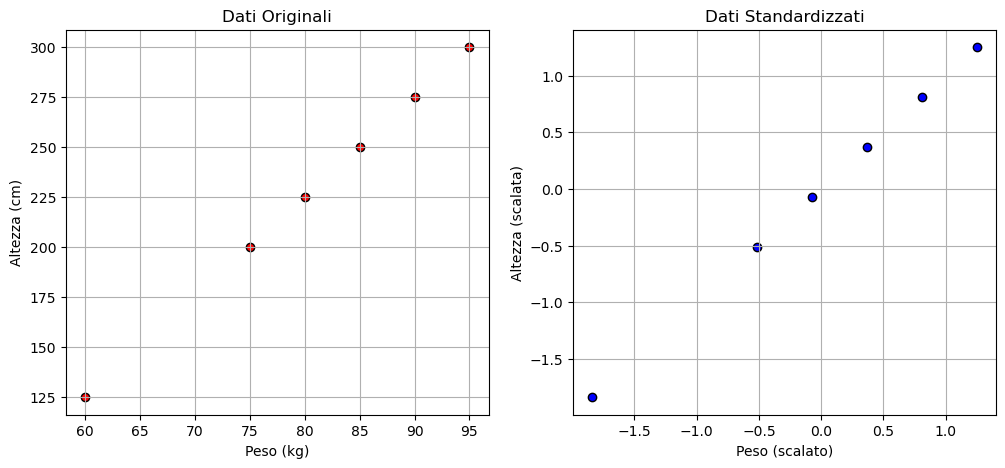

Dati originali:
 [[ 80 225]
 [ 60 125]
 [ 90 275]
 [ 75 200]
 [ 85 250]
 [ 95 300]]

Dati standardizzati:
 [[-0.07352146 -0.07352146]
 [-1.83803656 -1.83803656]
 [ 0.80873608  0.80873608]
 [-0.51465024 -0.51465024]
 [ 0.36760731  0.36760731]
 [ 1.24986486  1.24986486]]


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dataset di esempio: [Peso (kg), Altezza (cm)]
X = np.array([[80, 225], [60, 125], [90, 275], [75, 200], [85, 250], [95, 300]])

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Applica la standardizzazione
X_scaled = scaler.fit_transform(X)

# Creazione del grafico scatter
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Scatter plot dei dati originali
ax[0].scatter(X[:, 0], X[:, 1], color='red', edgecolors='black')
ax[0].set_title("Dati Originali")
ax[0].set_xlabel("Peso (kg)")
ax[0].set_ylabel("Altezza (cm)")
ax[0].grid(True)

# Scatter plot dei dati standardizzati
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue', edgecolors='black')
ax[1].set_title("Dati Standardizzati")
ax[1].set_xlabel("Peso (scalato)")
ax[1].set_ylabel("Altezza (scalata)")
ax[1].grid(True)

plt.show()

# Stampa dei dati originali e trasformati
print("Dati originali:\n", X)
print("\nDati standardizzati:\n", X_scaled)


## 📌 **6. Vantaggi e Svantaggi di KNN**
| ✅ **Vantaggi** | ❌ **Svantaggi** |
|----------------|----------------|
| Facile da implementare | Lento su dataset grandi |
| Funziona bene per dati ben separati | Sensibile agli **outlier** |
| Nessuna assunzione sui dati | Richiede **normalizzazione** dei dati |
| Può gestire problemi non lineari | Necessita di una scelta ottimale di \( k \) |

---

## 📌 **7. Conclusione**
Il KNN è un algoritmo molto utile, ma la sua efficacia dipende da:
1. **Scelta di \( k \)** → Cross-validation per trovare il valore ottimale.
2. **Misura di distanza** → Normalizzazione necessaria per caratteristiche con scale diverse.
3. **Efficienza computazionale** → Può essere lento su dataset molto grandi.

Se usato correttamente, **può fornire ottime performance in problemi di classificazione** con dati ben strutturati!


In [60]:
# 📌 Import necessary libraries
from sklearn.datasets import load_breast_cancer  # Load the dataset
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.preprocessing import StandardScaler  # Normalize the data
from sklearn.neighbors import KNeighborsClassifier  # KNN algorithm
from sklearn.metrics import accuracy_score  # Measure model performance

# 1️⃣ Load the Breast Cancer dataset
data = load_breast_cancer()  
X = data.data  # Features (30 attributes describing tumors)
y = data.target  # Labels (0 = malignant, 1 = benign)

# 2️⃣ Normalize the data to improve model performance
scaler = StandardScaler()  # Standardizes features (mean = 0, variance = 1)
X_scaled = scaler.fit_transform(X)  # Apply normalization

# 3️⃣ Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4️⃣ Apply K-Nearest Neighbors (KNN) with k=5
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 means each prediction is based on the 5 closest neighbors
knn.fit(X_train, y_train)  # Train the model on the training set

# 5️⃣ Make predictions on the test set
y_pred = knn.predict(X_test)

# 6️⃣ Evaluate the model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Accuratezza del modello: {accuracy:.2f}")  # Print accuracy as a percentage


📊 Accuratezza del modello: 0.95


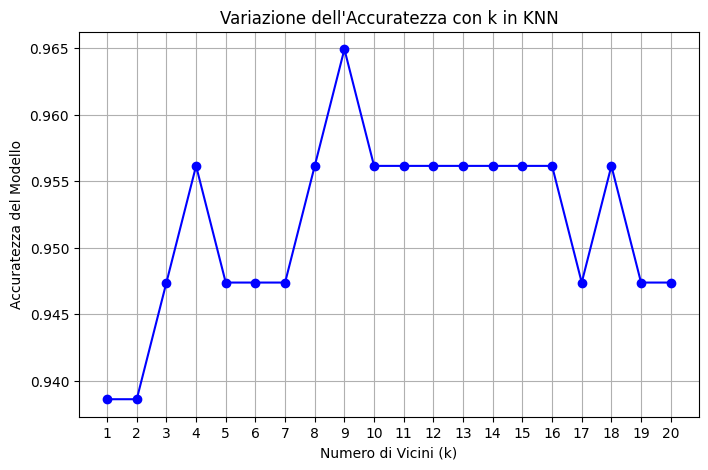

In [8]:
#Controlliamo come varia l'accuratezza al variare di n
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features (30 attributes describing tumors)
y = data.target  # Labels (0 = malignant, 1 = benign)

# 2️⃣ Normalize the data to improve model performance
scaler = StandardScaler()  # Standardizes features (mean = 0, variance = 1)
X_scaled = scaler.fit_transform(X)  # Apply normalization

# 3️⃣ Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4️⃣ Test the model with different values of n_neighbors and record accuracy
k_values = range(1, 21)  # Test k from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Apply KNN with k neighbors
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracies.append(accuracy)  # Store accuracy

# 5️⃣ Plot the accuracy as a function of n_neighbors
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Numero di Vicini (k)")
plt.ylabel("Accuratezza del Modello")
plt.title("Variazione dell'Accuratezza con k in KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()


# 📊 **Variazione dell'Accuratezza con \( k \) in KNN**
---

## 📌 **Interpretazione del Grafico**
Il grafico mostra **come varia l'accuratezza del modello KNN al variare del numero di vicini (\( k \))**.

### 🔹 **Osservazioni principali**
1. **Per valori di \( k \) molto bassi (1-3)**:
   - L'accuratezza è instabile perché il modello è più sensibile agli outlier.
   - C'è un **rischio di overfitting**, poiché il modello classifica i dati in base a pochissimi vicini.

2. **Per valori intermedi di \( k \) (5-12)**:
   - Il modello diventa più stabile.
   - L'accuratezza raggiunge il suo massimo valore.
   - Questo intervallo rappresenta **una scelta ottimale di \( k \)**.

3. **Per valori di \( k \) molto alti (\( >15 \))**:
   - L'accuratezza tende a diminuire progressivamente.
   - Il modello diventa **troppo generalista**, perdendo dettagli importanti.
   - C'è un **rischio di underfitting**, poiché il modello media su troppi dati diversi.

---

## 📌 **Scelta Ottimale di \( k \)**
💡 **L'obiettivo è trovare il valore di \( k \) che massimizza l'accuratezza senza causare overfitting o underfitting.**  
Tipicamente, si seleziona il valore di \( k \) **che offre il miglior compromesso tra stabilità e accuratezza**.

🚀 **Strategie per trovare il miglior \( k \)**:
- Testare diversi valori di \( k \) con **cross-validation**.
- Scegliere un valore dispari per evitare pareggi nella classificazione.
- Evitare valori troppo bassi (sensibili agli outlier) o troppo alti (eccessiva generalizzazione).

---


# 📌 **Come Scegliere il Valore Ottimale di \( k \) in KNN**
---

## 📌 **Perché il Test del Chi-Quadrato (\( \chi^2 \)) Non è Utile qui?**
Il **test del Chi-Quadrato (\( \chi^2 \))** è generalmente usato per verificare se **due distribuzioni categoriche sono significativamente diverse**. Tuttavia, **non è adatto per scegliere \( k \) in KNN**, per i seguenti motivi:

1️⃣ **KNN non è un metodo di clustering**  
   - Il test $( \chi^2 $) è utile per confrontare la distribuzione di classi in un contesto **di indipendenza tra variabili**, ma KNN è un **modello supervisionato**, quindi la classificazione è già guidata dai dati etichettati.

2️⃣ **La distribuzione delle classi predette può rimanere quasi invariata per diversi \( k \)**  
   - Se KNN inizia a prevedere quasi sempre la classe più comune, il test $( \chi^2 $) restituirà sempre valori molto bassi (nessuna differenza tra distribuzioni attesa e osservata), rendendolo inutile.

3️⃣ **Non misura direttamente la qualità della classificazione**  
   - \( \chi^2 \) verifica la somiglianza tra distribuzioni, ma non ci dice **se il modello sta classificando correttamente**.

---

## 📌 **Metodi Teorici per Scegliere \( k \)**
Invece del test $( \chi^2 $), possiamo stimare il valore ottimale di \( k \) usando **metodi teorici e pratici**.

### 🔹 **1. Regola Empirica: \( k = \sqrt{n} \)**
Una semplice euristica suggerisce:

$$
k = \sqrt{n}
$$

Dove:
- \( n \) è il **numero di campioni** nel dataset.
- Questa regola evita di scegliere un valore di \( k \) troppo piccolo (overfitting) o troppo grande (underfitting).

💡 **Vantaggi:** Facile da calcolare, spesso fornisce un buon punto di partenza.

---

### 🔹 **2. Regola Basata sulle Feature: \( k = d + 1 \)**
Un’altra possibile scelta è:

$$
k = d + 1
$$

Dove:
- \( d \) è il **numero di feature (dimensioni) nel dataset**.

💡 **Vantaggi:**  
- Assicura che ogni classificazione sia influenzata **da almeno un vicino per ogni dimensione** dello spazio delle feature.
- Utile in dataset con molte feature.

---

### 🔹 **3. Metodo Pratico: Testare Diversi \( k \) e Trovare il Migliore**
- Invece di affidarsi solo a una formula, possiamo **testare diversi valori di \( k \)** e scegliere quello che massimizza **l'accuratezza** del modello.
- Creiamo un **grafico dell’accuratezza in funzione di \( k \)** e confrontiamo con i valori teorici.

💡 **Strategia ottimale:**  
1. **Calcoliamo \( k \) teorici** con le due regole precedenti.
2. **Testiamo una gamma di valori** per \( k \) da 1 a 20.
3. **Confrontiamo i risultati** per trovare il valore ottimale.

---

## 📌 **Grafico Comparativo: Confrontiamo \( k \) Teorici e Pratici**
Il codice seguente:
- Calcola i valori teorici di \( k \) usando **$( \sqrt{n} $)** e **\( d+1 \)**.
- Testa diversi \( k \) e misura l'**accuratezza** su dati reali.
- Confronta i risultati in un **grafico** con linee verticali che segnano i valori teorici.



🔹 Theoretical k based on sqrt(n): 23
🔹 Theoretical k based on features: 31


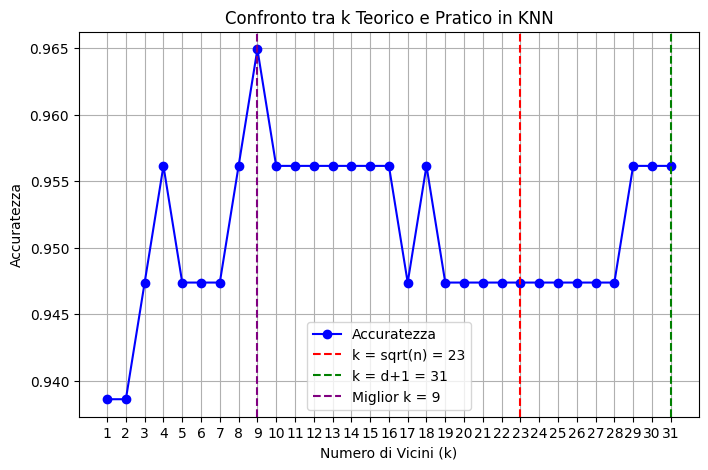

🔹 Miglior k in base all'accuratezza: 9


In [10]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Caricamento del dataset
data = load_breast_cancer()
X = data.data
y = data.target
n_samples, n_features = X.shape  # Numero di campioni e feature

# 2️⃣ Normalizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Suddivisione in training (80%) e testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4️⃣ Calcolo dei valori teorici di k
k_sqrt_n = int(np.sqrt(n_samples))  # Regola: k = sqrt(n)
k_features = n_features + 1  # Regola: k = d + 1
print(f"🔹 Theoretical k based on sqrt(n): {k_sqrt_n}")
print(f"🔹 Theoretical k based on features: {k_features}")

# 5️⃣ Testiamo diversi k e registriamo l'accuratezza
k_values = range(1, 32)  # Testiamo k da 1 a 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Troviamo il miglior k in base all'accuratezza
best_k_accuracy = k_values[np.argmax(accuracies)]

# 6️⃣ Creazione del grafico
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Accuratezza")

# Linee verticali per i valori teorici di k
plt.axvline(x=k_sqrt_n, color='r', linestyle="--", label=f"k = sqrt(n) = {k_sqrt_n}")
plt.axvline(x=k_features, color='g', linestyle="--", label=f"k = d+1 = {k_features}")
plt.axvline(x=best_k_accuracy, color='purple', linestyle="--", label=f"Miglior k = {best_k_accuracy}")

plt.xlabel("Numero di Vicini (k)")
plt.ylabel("Accuratezza")
plt.title("Confronto tra k Teorico e Pratico in KNN")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Stampiamo i risultati
print(f"🔹 Miglior k in base all'accuratezza: {best_k_accuracy}")


🔹 Theoretical k based on sqrt(n): 22
🔹 Theoretical k based on features: 6


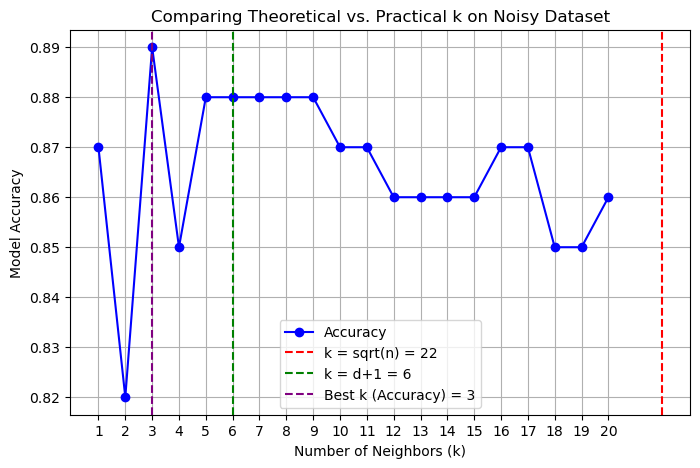

🔹 Best k based on Accuracy: 3


In [89]:
# 📌 Generate a Less Accurate Example Using a Simpler Dataset (Fixed)

# 1️⃣ Generate a Synthetic Dataset
# - 3 informative features (increases valid clusters)
# - 2 redundant features (adds noise)
# - 3 classes to make classification harder
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=2, n_classes=3, random_state=42)

# Get dataset shape
n_samples, n_features = X.shape

# 2️⃣ Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4️⃣ Compute Theoretical k values
k_sqrt_n = int(np.sqrt(n_samples))  # Rule of thumb: k = sqrt(n)
k_features = n_features + 1  # Rule of thumb: k = d + 1

print(f"🔹 Theoretical k based on sqrt(n): {k_sqrt_n}")
print(f"🔹 Theoretical k based on features: {k_features}")

# 5️⃣ Test different k values and record accuracy
k_values = range(1, 21)  # Test k from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Find the best k based on accuracy
best_k_accuracy = k_values[np.argmax(accuracies)]

# 6️⃣ Plot Accuracy vs. k with theoretical k values
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")

# Mark theoretical k values
plt.axvline(x=k_sqrt_n, color='r', linestyle="--", label=f"k = sqrt(n) = {k_sqrt_n}")
plt.axvline(x=k_features, color='g', linestyle="--", label=f"k = d+1 = {k_features}")
plt.axvline(x=best_k_accuracy, color='purple', linestyle="--", label=f"Best k (Accuracy) = {best_k_accuracy}")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Model Accuracy")
plt.title("Comparing Theoretical vs. Practical k on Noisy Dataset")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Print results
print(f"🔹 Best k based on Accuracy: {best_k_accuracy}")


# 📌 **Analisi Finale sulla Scelta di \( k \) in KNN**
---

## 📊 **Osservazioni sui Risultati**
Abbiamo confrontato:
1. **Valori teorici di \( k \)**:
   - **\( k = \sqrt{n} = 22 \)** (linea rossa) → Più alto del previsto a causa della dimensione del dataset.
   - **\( k = d+1 = 6 \)** (linea verde) → Più allineato alla complessità delle feature.

2. **Miglior \( k \) basato sull'accuratezza**:  
   - **\( k = 3 \)** (linea viola) → Il valore che ottimizza le prestazioni del modello.

---

## ✅ **Perché il miglior \( k \) è più basso del previsto?**
- Il dataset generato **è più rumoroso e complesso** (5 feature, 3 classi).
- Un **\( k \) più basso** cattura meglio i **confini decisionali locali**.
- Valori più alti di \( k \) rendono il modello **troppo generico**, riducendo la capacità di distinguere classi simili.

---

## 📌 **Perché \( k = \sqrt{n} \) è troppo alto?**
$$
k = \sqrt{n}
$$
- Questa regola assume che i dati siano **distribuiti uniformemente** nello spazio delle feature.
- In dataset **rumorosi o con classi non bilanciate**, questa formula sovrastima \( k \), portando a **overgeneralizzazione**.

---

## 🔥 **Conclusioni**
- **Usare \( k = \sqrt{n} \) e \( k = d+1 \) come punto di partenza, ma sempre validarli sperimentalmente.**
- **Dataset più complessi e rumorosi tendono a richiedere un \( k \) più basso (3-5) per ottenere una buona accuratezza.**
- **Il miglior \( k \) deve bilanciare accuratezza e generalizzazione**, evitando sia **overfitting (\( k \) troppo basso)** che **underfitting (\( k \) troppo alto)**.

---

## 🚀 **Metodo Raccomandato per Scegliere \( k \)**
1. **Calcolare i valori teorici di \( k \):**
   $$
   k = \sqrt{n}
   $$
   $$
   k = d+1
   $$
   
2. **Testare un intervallo di \( k \) tra 1 e 20.**

3. **Scegliere il valore che massimizza l'accuratezza** nel test.

4. **Verificare se il miglior \( k \) trovato è vicino ai valori teorici.**
   - Se sì, i modelli teorici funzionano bene.
   - Se no, si preferisce l'ottimizzazione sperimentale.

---



In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#

# 📌 **Approfondimento su DecisionTreeClassifier**
---

## 📌 **1. Cos'è un Decision Tree?**
Un **Decision Tree** è un modello di Machine Learning supervisionato utilizzato per **compiti di classificazione e regressione**.  
Si basa sulla suddivisione ricorsiva del dataset in sottogruppi sempre più puri.

- **Ogni nodo** rappresenta una condizione su una feature.
- **Ogni ramo** indica un possibile risultato della condizione.
- **Le foglie** rappresentano la classe predetta.

Esempio visivo di un piccolo **Decision Tree**:



# Calcolo dell'Impurità di Gini in un Decision Tree

L'impurità di Gini si calcola con la formula:

$$
Gini = 1 - \sum_{i=1}^{k} p_i^2
$$

Dove \( p_i \) è la probabilità di ciascuna classe nel nodo.

---

## **Esempio Pratico**

Supponiamo di avere un dataset con 10 istanze e due classi:
- **Classe A**: 4 esempi
- **Classe B**: 6 esempi

### **Step 1: Calcolare le Probabilità**
La probabilità di ogni classe è:

$$
p_A = \frac{4}{10} = 0.4, \quad p_B = \frac{6}{10} = 0.6
$$

### **Step 2: Calcolare l'Impurità di Gini**
Applichiamo la formula:

$$
Gini = 1 - (p_A^2 + p_B^2)
$$

Sostituendo i valori:

$$
Gini = 1 - (0.4^2 + 0.6^2)
$$

$$
Gini = 1 - (0.16 + 0.36)
$$

$$
Gini = 1 - 0.52 = 0.48
$$

L'impurità di Gini per questo nodo è **0.48**.

---

## **Caso di un Nodo Figlio**

Supponiamo di dividere il dataset in due sottoinsiemi:

- **Nodo Sinistro:** 5 esempi (Classe A: 3, Classe B: 2)
- **Nodo Destro:** 5 esempi (Classe A: 1, Classe B: 4)

### **Step 3: Calcolare l'Impurità di Gini per ciascun nodo**

#### **Nodo Sinistro**
$$
p_A = \frac{3}{5} = 0.6, \quad p_B = \frac{2}{5} = 0.4
$$

$$
Gini_{left} = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 1 - 0.52 = 0.48
$$

#### **Nodo Destro**
$$
p_A = \frac{1}{5} = 0.2, \quad p_B = \frac{4}{5} = 0.8
$$

$$
Gini_{right} = 1 - (0.2^2 + 0.8^2) = 1 - (0.04 + 0.64) = 1 - 0.68 = 0.32
$$

### **Step 4: Calcolare l'Impurità di Gini Ponderata**
Il Gini totale dopo la divisione si calcola come:

$$
Gini_{split} = \frac{5}{10} Gini_{left} + \frac{5}{10} Gini_{right}
$$

$$
Gini_{split} = 0.5 \times 0.48 + 0.5 \times 0.32
$$

$$
Gini_{split} = 0.24 + 0.16 = 0.40
$$

Poiché \( Gini_{split} = 0.40 \) è inferiore all'impurità originale \( Gini = 0.48 \), questa divisione migliora la purezza del dataset.

---

## **Conclusione**
Abbiamo calcolato l'impurità di Gini iniziale e dopo una divisione del dataset. Se il valore di Gini diminuisce dopo una divisione, significa che il nodo è più puro e la suddivisione è utile per il decision tree.


          Feature1 < 5?
          /         \
    YES /           \ NO
     Leaf1         Feature2 < 3?
                    /       \
                YES /         \ NO
                 Leaf2       Leaf3


# 📌 **Misure di Impurità in un Decision Tree**
---

## 📌 **1. Impurità di Gini**
L'**impurità di Gini** è una misura che indica **quanto un nodo è disomogeneo** all'interno di un albero decisionale.  
Viene calcolata come:

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

Dove:
- \( C \) è il numero totale delle classi nel nodo.
- \( p_i \) è la **proporzione degli esempi appartenenti alla classe \( i \)** all'interno del nodo, calcolata come:

  $$
  p_i = \frac{\text{numero di esempi della classe } i}{\text{numero totale di esempi nel nodo}}
  $$

📌 **Interpretazione**:
- Se un nodo contiene **solo esempi di una stessa classe**, allora la sua impurità è **zero**:
  $$
  Gini = 1 - 1^2 = 0
  $$
  → **Nodo puro**.
- Se un nodo ha **distribuzione uniforme** tra le classi, l'impurità è **massima**:
  - Ad esempio, in un nodo con **2 classi** e **50% di ciascuna**:

    $$
    Gini = 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 = 0.5
    $$

🔹 **Quando Gini è utile?**
- Utile per **dataset bilanciati**, in cui le classi hanno una distribuzione simile.
- Preferito in molti algoritmi perché **più veloce da calcolare** rispetto all'entropia.

---

## 📌 **2. Entropia**
L'**entropia** è un'altra misura dell'eterogeneità di un nodo, che deriva dalla teoria dell'informazione.  
Viene calcolata come:

$$
Entropy = -\sum_{i=1}^{C} p_i \log_2 p_i
$$

Dove:
- \( p_i \) è sempre la **proporzione degli esempi della classe \( i \)** nel nodo.

📌 **Interpretazione**:
- Se il nodo contiene solo una classe (**nodo puro**), allora l'entropia è **zero**:
  $$
  - 1 \log_2 1 = 0
  $$
- Se tutte le classi sono equamente distribuite, l'entropia è **massima**:
  - Ad esempio, per un nodo con **2 classi** equamente distribuite:

    $$
    Entropy = -\left(\frac{1}{2} \log_2 \frac{1}{2} + \frac{1}{2} \log_2 \frac{1}{2}\right) = 1
    $$

🔹 **Quando l'entropia è utile?**
- Preferita quando si lavora con **dataset molto sbilanciati**.
- Fornisce una misura più sensibile ai **cambiamenti nei dati** rispetto a Gini.

---

## 📌 **3. Confronto tra Gini ed Entropia**
| Misura  | Formula | Massima impurità | Nodo puro | Vantaggi |
|---------|---------|------------------|-----------|----------|
| **Gini** | \( Gini = 1 - \sum p_i^2 \) | \( 0.5 \) per due classi bilanciate | \( 0 \) | Computazione più veloce |
| **Entropia** | \( Entropy = -\sum p_i \log_2 p_i \) | \( 1 \) per due classi bilanciate | \( 0 \) | Più precisa su dataset sbilanciati |

📌 **In pratica:**
- **Se si vuole un algoritmo più veloce**, usare **Gini**.
- **Se si vuole una misura più sensibile ai dati sbilanciati**, usare **Entropia**.

---

💡 **Ora hai una comprensione chiara delle misure di impurità!** 🚀  
Se vuoi vedere un'implementazione pratica con codice Python, fammelo sapere! 😊



---

## 📌 **2. Come Funziona un Decision Tree?**
L'algoritmo divide i dati basandosi su **metriche di impurità**:

### 🔹 **2.1 Impurità di Gini**
L'**impurità di Gini** misura quanto disomogeneo è un nodo. È calcolata come:

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

Dove:
- \( p_i \) è la proporzione degli esempi della classe \( i \).
- \( C \) è il numero totale delle classi.

Un nodo è **puro** se \( Gini = 0 \), cioè contiene solo esempi di una stessa classe.

---

### 🔹 **2.2 Entropia**
L'**entropia** misura il disordine in un nodo:

$$
Entropy = -\sum_{i=1}^{C} p_i \log_2 p_i
$$

Maggiore è l'entropia, più il nodo è eterogeneo.

---

## 📌 **3. Costruzione di un Albero**
L'albero si costruisce con la seguente logica:
1. **Si calcola Gini o Entropia** per tutte le possibili divisioni.
2. **Si sceglie la feature e il valore di soglia** che riducono al massimo l'impurità.
3. **Si ripete il processo** fino a raggiungere il numero massimo di livelli o un nodo puro.

---

## 📌 **4. Quando Usare DecisionTreeClassifier?**
✅ **Vantaggi:**
- Interpretabile e facile da visualizzare.
- Può gestire feature sia **numeriche che categoriche**.
- **Poco preprocessing** richiesto.

❌ **Svantaggi:**
- Può soffrire di **overfitting** se troppo profondo.
- Sensibile a **dati rumorosi**.

📌 **Usarlo quando:**
- Serve un modello **interpretabile**.
- Il dataset ha feature **miste**.
- Non si dispone di molti dati (funziona bene anche con pochi campioni).

---

## 📌 **5. Esempio Pratico con Grafico**
Vediamo ora un esempio pratico con Python.

```python



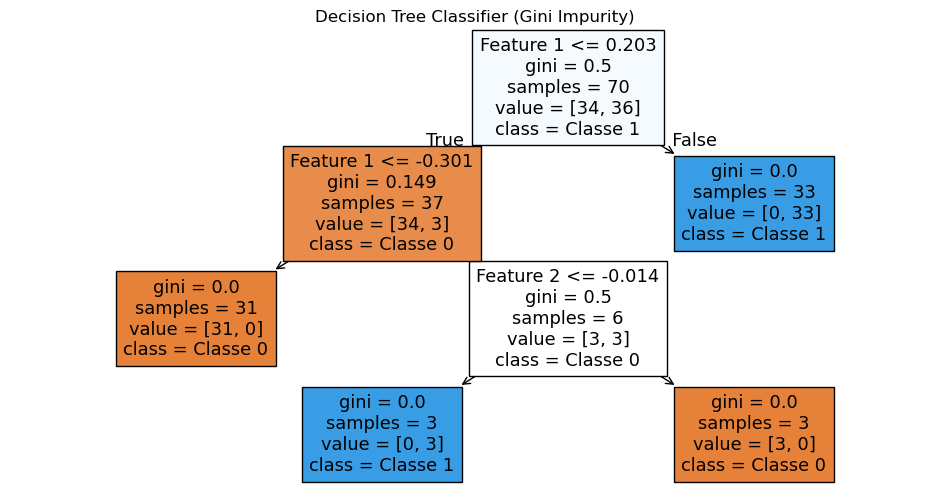

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# 1️⃣ Generiamo un dataset di esempio con parametri corretti
X, y = make_classification(n_samples=100, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=2, random_state=42)

# 2️⃣ Dividiamo in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Creiamo il modello Decision Tree
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
tree.fit(X_train, y_train)

# 4️⃣ Visualizziamo l'albero decisionale
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=["Feature 1", "Feature 2"], class_names=["Classe 0", "Classe 1"], filled=True)
plt.title("Decision Tree Classifier (Gini Impurity)")
plt.show()


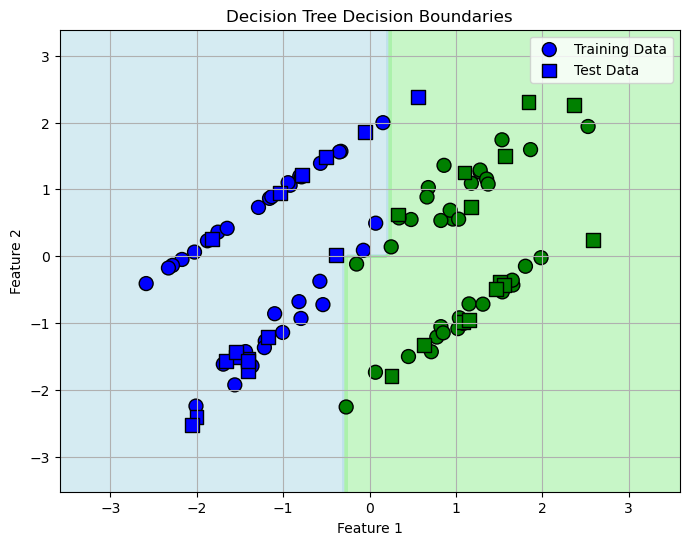

In [107]:
from matplotlib.colors import ListedColormap

# Creiamo il meshgrid per le decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prediciamo le classi su tutto il grid
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plottiamo le decision boundaries
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['lightblue', 'lightgreen'])
cmap_points = ['blue', 'green']

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(cmap_points), edgecolor='black', s=100, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(cmap_points), marker='s', edgecolor='black', s=100, label="Test Data")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()


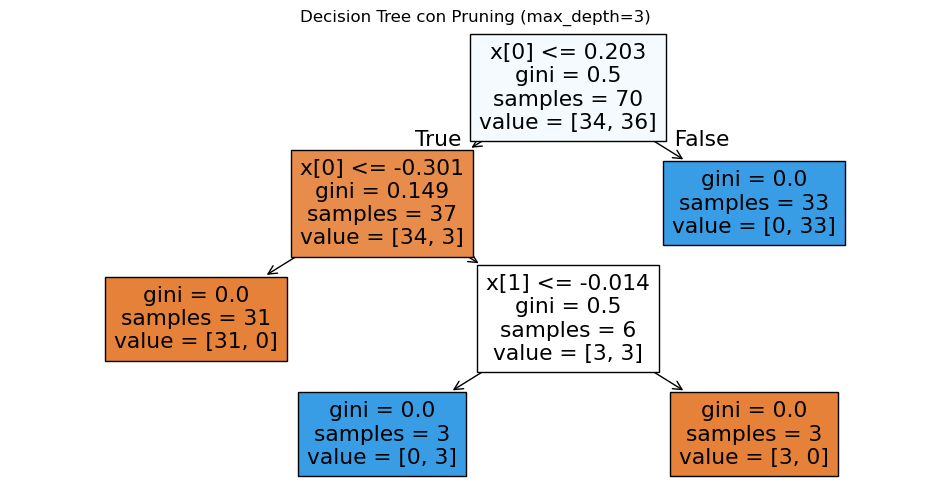

In [109]:
tree_pruned = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
tree_pruned.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(tree_pruned, filled=True)
plt.title("Decision Tree con Pruning (max_depth=3)")
plt.show()


# 📌 **Come Vengono Calcolati i Boundaries in un Decision Tree?**
---

## 📌 **1. Cos'è un Boundaries in un Decision Tree?**
Un **boundaries** (confine di decisione) è la linea che separa le classi nel piano delle feature.  
Nei **Decision Tree**, i boundaries sono sempre **rettilinei e paralleli agli assi**, poiché ogni split avviene considerando **una singola feature alla volta**.

---

## 📌 **2. Processo di Costruzione dei Confini di Decisione**
Il **Decision Tree** costruisce i confini eseguendo **divisioni sequenziali** lungo gli assi delle feature.  
Il processo avviene in questo modo:

1. Si calcola una **metrica di impurità** (Gini o Entropia) per ogni feature.
2. Si seleziona la **feature migliore** per la divisione.
3. Si imposta una **soglia di split** che minimizza l'impurità.
4. Si ripete il processo per ogni sottoinsieme finché:
   - Il nodo contiene solo una classe (puro).
   - Si raggiunge una profondità massima.

Ogni **split** genera una **nuova regione rettangolare**, creando confini paralleli agli assi.

---

## 📌 **3. Formula Matematica dello Split**
Ad ogni passo, l'algoritmo cerca la **miglior soglia \( t \)** per una feature \( x_j \), tale da **minimizzare** l'impurità totale dopo la divisione.

$$
\text{Impurità} = p_L \cdot I(L) + p_R \cdot I(R)
$$

Dove:
-$( p_L $) e $( p_R $) sono le proporzioni dei dati nei due sottoinsiemi.
- $( I(L) $) e $( I(R) $) sono le impurità (Gini o Entropia) dei due nodi generati dallo split.

L'algoritmo esplora **tutti i valori possibili di \( t \)** e sceglie quello che **riduce al massimo l'impurità**.

---

## 📌 **4. Esempio Visivo con Due Feature**
Vediamo un esempio con **due feature**:

```python


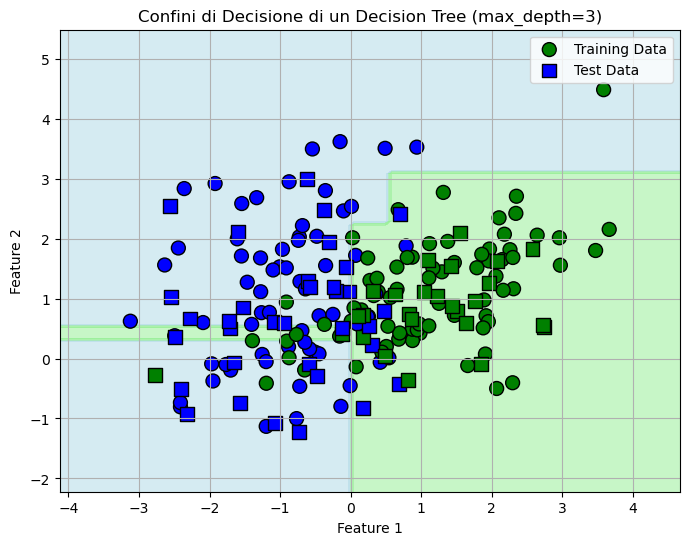

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 1️⃣ Creiamo un dataset con due feature
X, y = make_classification(n_samples=200, n_features=2, 
                           n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2️⃣ Suddividiamo in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Creiamo il modello Decision Tree
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
tree.fit(X_train, y_train)

# 4️⃣ Creiamo il meshgrid per visualizzare i confini
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 5️⃣ Prediciamo la classe su tutta la griglia
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6️⃣ Visualizziamo i confini di decisione
plt.figure(figsize=(8,6))
cmap_background = ListedColormap(['lightblue', 'lightgreen'])
cmap_points = ['blue', 'green']

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(cmap_points), edgecolor='black', s=100, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(cmap_points), marker='s', edgecolor='black', s=100, label="Test Data")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Confini di Decisione di un Decision Tree (max_depth=3)")
plt.legend()
plt.grid(True)
plt.show()


# 📌 **Come Determinare il Valore Massimo di `max_depth` in un Decision Tree?**
---

## 📌 **1. Cos'è `max_depth` e Perché È Importante?**
Il parametro `max_depth` in un **Decision Tree** controlla **quanto profondamente** l'albero può crescere.  
Se l'albero è **troppo profondo**, rischia di **memorizzare il dataset** (**overfitting**).  
Se è **troppo superficiale**, potrebbe non catturare bene le relazioni nei dati (**underfitting**).

---

## 📌 **2. Metodo Teorico per Determinare `max_depth`**
Un albero decisionale ha una struttura **gerarchica**, dove ogni nodo si divide in due sottogruppi.  
Il numero massimo di livelli \( d_{\max} \) può essere stimato in base alla **dimensione del dataset**:

$$
d_{\max} = \log_2(n)
$$

Dove:
- \( n \) è il **numero di esempi nel dataset**.
- \( d_{\max} \) è la **profondità massima teorica**.

📌 **Esempio**:  
Se abbiamo \( n = 1000 \) campioni, il valore massimo di profondità sarà:

$$
d_{\max} = \log_2(1000) \approx 10
$$

Quindi, il valore massimo ragionevole per `max_depth` è **10**.

---

## 📌 **3. Metodo Pratico per Determinare `max_depth`**
### 🔹 **3.1 Utilizzare la Cross-Validation**
Un modo pratico per scegliere `max_depth` è usare la **cross-validation** e testare diverse profondità.

```python



🌟 La miglior profondità trovata è: 2


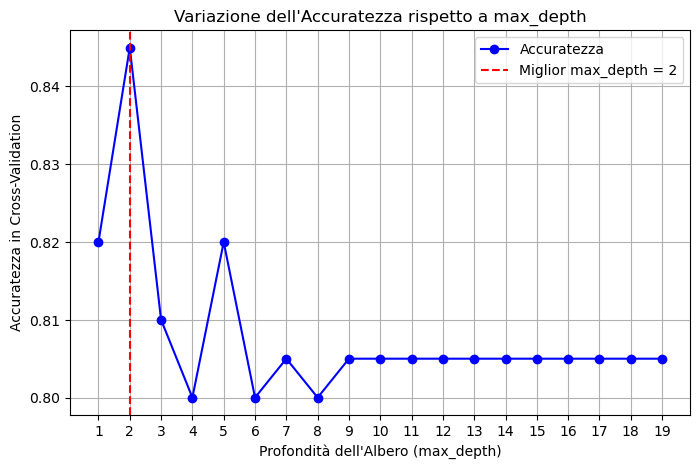

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Lista di profondità da testare
depths = np.arange(1, 20)

# Lista per memorizzare le accuratezze
scores = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    score = np.mean(cross_val_score(tree, X, y, cv=5, scoring="accuracy"))
    scores.append(score)

# Troviamo il valore migliore
best_depth = depths[np.argmax(scores)]
print(f"🌟 La miglior profondità trovata è: {best_depth}")


# 📌 Creazione del grafico di variazione dell'accuratezza in funzione di max_depth
plt.figure(figsize=(8, 5))
plt.plot(depths, scores, marker='o', linestyle='-', color='b', label="Accuratezza")

# Evidenziamo il punto della miglior profondità trovata
plt.axvline(x=best_depth, color='r', linestyle="--", label=f"Miglior max_depth = {best_depth}")

plt.xlabel("Profondità dell'Albero (max_depth)")
plt.ylabel("Accuratezza in Cross-Validation")
plt.title("Variazione dell'Accuratezza rispetto a max_depth")
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()


# 📌 **Pruning nei Decision Tree**
---

## 📌 **1. Cos'è il Pruning e Perché È Importante?**
Il **pruning** (potatura) è una tecnica per **ridurre la complessità di un Decision Tree**, eliminando rami non necessari.  
L'obiettivo è prevenire l'**overfitting**, migliorando la **generalizzazione** del modello su nuovi dati.

📌 **Un albero troppo profondo può:**
- **Memorizzare i dati di training**, senza generalizzare bene (**overfitting**).
- **Essere inefficiente**, con più nodi del necessario.

Il pruning aiuta a rendere l'albero **più semplice ed efficace**.

---

## 📌 **2. Tipi di Pruning**
Ci sono **due tipi principali di pruning** nei Decision Tree:

### 🔹 **2.1 Pre-Pruning (Early Stopping)**
Il **pre-pruning** impedisce all'albero di crescere troppo in fase di training, limitando:
- **`max_depth`** → Profondità massima dell'albero.
- **`min_samples_split`** → Numero minimo di campioni per suddividere un nodo.
- **`min_samples_leaf`** → Numero minimo di campioni in una foglia.

📌 **Formula per `min_samples_split`**  
Un nodo si divide solo se contiene almeno:

$$
\text{campioni} \geq (\text{min\_samples\_split})
$$


**Pro** ✅  
- Riduce la complessità dell'albero **durante la creazione**.
- Evita **rami inutili**, migliorando l'efficienza.

**Contro** ❌  
- Potrebbe **fermare la crescita troppo presto**, senza trovare il miglior split.

---

### 🔹 **2.2 Post-Pruning**
Il **post-pruning** fa crescere l'albero fino alla massima profondità e poi rimuove i nodi inutili.  
Si basa sul parametro `ccp_alpha` (**cost complexity pruning**), che controlla il trade-off tra **complessità** e **accuratezza**.

📌 **Formula della penalità per la complessità**  
Per ogni sotto-albero \( T \):

$$
\text{Errore con pruning} = \text{Errore originale} + \alpha \cdot \text{Numero di nodi}
$$

Dove:
- \( \alpha \) è il parametro di pruning.
- Se \( \alpha \) è **troppo alto**, l'albero diventa **troppo semplice**.
- Se \( \alpha \) è **troppo basso**, l'albero **non viene potato**.

---

## 📌 **3. Implementazione del Pre-Pruning**
Vediamo un esempio pratico con `max_depth` e `min_samples_split`.

```python



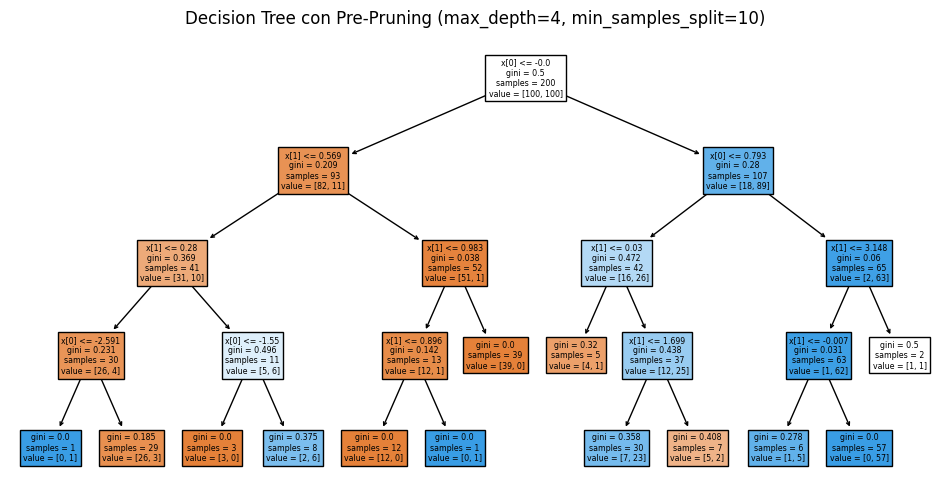

In [19]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 📌 Generiamo un dataset di esempio
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# 📌 Creiamo un Decision Tree con Pre-Pruning
tree_prepruned = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
tree_prepruned.fit(X, y)

# 📌 Visualizziamo l'albero con pruning
plt.figure(figsize=(12, 6))
plot_tree(tree_prepruned, filled=True)
plt.title("Decision Tree con Pre-Pruning (max_depth=4, min_samples_split=10)")
plt.show()

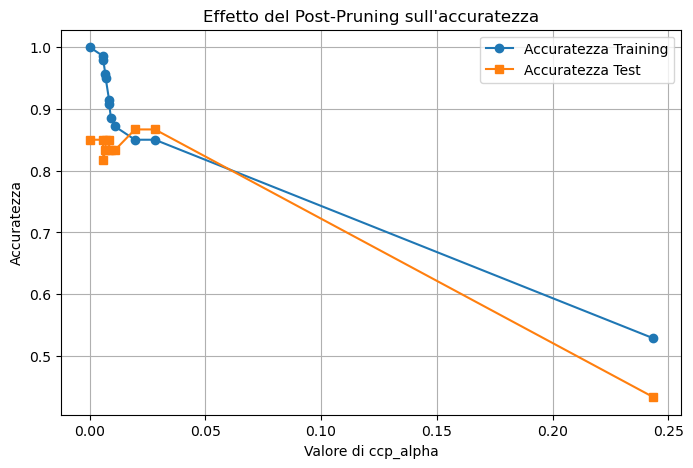

In [132]:
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Dividiamo il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Creiamo un Decision Tree senza pruning
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

# 📌 Otteniamo i valori di pruning (ccp_alpha)
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 📌 Creiamo alberi con diversi livelli di pruning
trees = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# 📌 Valutiamo le performance per diversi valori di pruning
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

# 📌 Grafico delle performance
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Accuratezza Training")
plt.plot(ccp_alphas, test_scores, marker='s', label="Accuratezza Test")

plt.xlabel("Valore di ccp_alpha")
plt.ylabel("Accuratezza")
plt.title("Effetto del Post-Pruning sull'accuratezza")
plt.legend()
plt.grid(True)
plt.show()


# 📌 **Gradient Boosting Classifier (GBC)**
---

## 📌 **1. Cos'è Gradient Boosting Classifier?**
Il **Gradient Boosting Classifier (GBC)** è un algoritmo **ensemble** che costruisce **una serie di alberi decisionali** in modo sequenziale, migliorando ad ogni iterazione.  
L'obiettivo è **ridurre gli errori del modello precedente** usando il **gradiente della funzione di perdita**.

📌 **Differenze con il Decision Tree**:
- Invece di **un solo albero**, usa **molti alberi deboli**.
- Ogni albero successivo **corregge gli errori** di quello precedente.
- Funziona bene con dati **complessi e non lineari**.

---

## 📌 **2. Come Funziona il Gradient Boosting?**
Il **principio chiave** del Gradient Boosting è che **ogni nuovo albero apprende dagli errori del modello precedente**.  

Il processo avviene in questi passi:

1. **Si addestra un primo albero** \( F_0(x) \) che fa previsioni iniziali.
2. **Si calcola l'errore residuo** \( r_i \), cioè la differenza tra la previsione e il valore reale:

   $$
   r_i = y_i - F(x_i)
   $$

3. **Si addestra un nuovo albero** per predire \( r_i \) (l'errore del modello precedente).
4. **Si somma il nuovo albero al modello esistente**, moltiplicato per un parametro di apprendimento \( \eta \):

   $$
   F_{t+1}(x) = F_t(x) + \eta h_t(x)
   $$

5. Si ripete il processo per un numero di iterazioni \( T \).

📌 **Perché funziona?**  
Ogni nuovo albero **riduce l'errore totale** approssimando il **gradiente della funzione di perdita**.

---

## 📌 **3. Funzione di Perdita e Gradiente**
GBC utilizza **la discesa del gradiente** per minimizzare l'errore.  
La funzione di perdita comune è l'**errore quadratico medio (MSE)**:

$$
L = \sum_{i=1}^{n} (y_i - F(x_i))^2
$$

📌 **Passaggi della discesa del gradiente**:
1. Si calcola la derivata della funzione di perdita rispetto alle previsioni:

   $$
   g_i = \frac{\partial L}{\partial F(x_i)} = -2(y_i - F(x_i))
   $$

2. Si usa \( g_i \) come nuovo target per addestrare il prossimo albero.
3. Si aggiorna il modello combinando i nuovi alberi.

---

## 📌 **4. Implementazione di Gradient Boosting Classifier**
Ora vediamo un esempio pratico con `GradientBoostingClassifier` di Scikit-Learn.

```python


In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 📌 Creiamo un dataset di esempio
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, 
                           n_redundant=2, random_state=42)

# 📌 Suddivisione in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Creiamo il modello Gradient Boosting con 100 alberi
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# 📌 Predizioni e accuratezza
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"📊 Accuratezza del modello Gradient Boosting: {accuracy:.2f}")


📊 Accuratezza del modello Gradient Boosting: 0.94


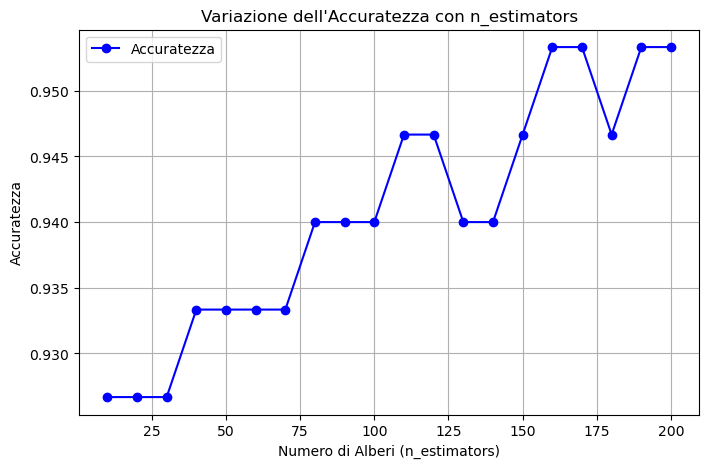

In [141]:
#variazione dell'accuratezza in base agli alberi

n_estimators_range = range(10, 201, 10)
accuracies = []

for n in n_estimators_range:
    gbc = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 📌 Creazione del grafico
plt.figure(figsize=(8,5))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b', label="Accuratezza")

plt.xlabel("Numero di Alberi (n_estimators)")
plt.ylabel("Accuratezza")
plt.title("Variazione dell'Accuratezza con n_estimators")
plt.grid(True)
plt.legend()
plt.show()


# 📌 **Osservazioni**
- Con **pochi alberi**, il modello è **sottotarato** (**underfitting**).
- **Troppi alberi** possono portare a **overfitting**.

---

# 📌 **6. Confronto tra GBC e Decision Tree**

| **Algoritmo**          | **Interpretabilità**        | **Overfitting**               | **Performance**           |
|------------------------|---------------------------|------------------------------|---------------------------|
| **Decision Tree**      | ✅ Facile da interpretare | 🔴 Alto senza pruning        | 🟡 Media                   |
| **Gradient Boosting**  | ❌ Difficile da interpretare | 🟢 Minore (boosting aiuta) | 🔴 Alta                    |

---

# 📌 **Quando usare GBC?**
- Quando si vuole **massimizzare l'accuratezza**.
- Se i dati sono **complessi** e il **Decision Tree non basta**.
- Se si ha **tempo di calcolo sufficiente** (più lento di un singolo albero).

---

# 📌 **7. Ottimizzazione di Gradient Boosting**
Per migliorare il modello, possiamo:

- **Aumentare il numero di alberi** (`n_estimators`) → migliora la precisione, ma **aumenta il tempo di training**.
- **Regolare il learning rate** (`learning_rate`) → un valore **troppo alto** causa **oscillazioni**.
- **Limitare la profondità degli alberi** (`max_depth`) → alberi **più profondi rischiano l'overfitting**.


In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gbc = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"📊 Migliori parametri trovati: {grid_search.best_params_}")


📊 Migliori parametri trovati: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


# 📌 **GridSearchCV: Ottimizzazione degli Iperparametri**
---

## 📌 **1. Cos'è GridSearchCV?**
`GridSearchCV` è una tecnica di **ottimizzazione degli iperparametri** che permette di trovare la **miglior combinazione di parametri** per un modello di Machine Learning.

📌 **Cosa fa GridSearchCV?**
1. **Crea una griglia di parametri da testare**.
2. **Addestra il modello con tutte le combinazioni possibili**.
3. **Valuta il modello con Cross-Validation**.
4. **Restituisce la combinazione ottimale di parametri**.

---

## 📌 **2. Differenza tra Parametri e Iperparametri**
- **Parametri** → Sono **appresi** dal modello durante il training (es. coefficienti di regressione in una `LinearRegression`).
- **Iperparametri** → Sono **impostati dall'utente** e **non vengono appresi** automaticamente (es. `max_depth` in un `DecisionTreeClassifier`).

GridSearchCV aiuta a scegliere **i migliori iperparametri** per il modello.

---

## 📌 **3. Come Funziona GridSearchCV?**
Il processo avviene in questi passi:

1️⃣ **Definizione della griglia di ricerca**  
Creiamo un dizionario di iperparametri da testare.

2️⃣ **Addestramento del modello su tutte le combinazioni**  
Per ogni combinazione di parametri, viene **allenato un modello separato**.

3️⃣ **Cross-Validation per valutare i modelli**  
Ogni combinazione viene valutata con **K-Fold Cross Validation**.

4️⃣ **Scelta della miglior combinazione**  
Si seleziona la combinazione che **massimizza una metrica** (es. accuratezza, F1-score).

---

## 📌 **4. Formula Matematica di GridSearchCV**
Il processo di **Cross-Validation** all'interno di GridSearchCV segue questa logica:

$$
\hat{\theta} = \arg\max_{\theta \in \Theta} \frac{1}{K} \sum_{k=1}^{K} M_k(\theta)
$$

Dove:
- $( \hat{\theta} $) è il **set di iperparametri ottimale**.
- $( \Theta $) è l'insieme di tutte le combinazioni possibili di iperparametri.
- $( M_k(\theta) $) è la **metrica di valutazione** (es. accuratezza, F1-score) per la \( k \)-esima fold.
- $( K $) è il numero di **folds nella cross-validation**.

---

## 📌 **5. Implementazione di GridSearchCV**
Ora vediamo come applicare GridSearchCV con `GradientBoostingClassifier`.

```python



In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 📌 Generiamo un dataset di esempio
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, 
                           n_redundant=2, random_state=42)

# 📌 Suddivisione in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Definiamo la griglia di iperparametri
param_grid = {
    'n_estimators': [50, 100, 200],  # Numero di alberi
    'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
    'max_depth': [3, 5, 7]  # Profondità massima degli alberi
}

# 📌 Creiamo il modello Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)

# 📌 Creiamo GridSearchCV con Cross-Validation (cv=5)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 📌 Stampiamo i migliori parametri trovati
print(f"📊 Migliori parametri trovati: {grid_search.best_params_}")

# 📌 Miglior modello addestrato con i parametri ottimali
best_model = grid_search.best_estimator_

📊 Migliori parametri trovati: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


# 📌 **Cosa Succede Qui?**
- Si **testano tutte le combinazioni possibili** di `n_estimators`, `learning_rate` e `max_depth`.
- Ogni combinazione viene **validata con Cross-Validation (cv=5)** per ottenere una valutazione affidabile.
- La combinazione che **massimizza l'accuratezza media sui fold di Cross-Validation** viene **selezionata** come ottimale.

---

# 📌 **6. Confronto tra GridSearchCV e RandomizedSearchCV**

| **Metodo** | **Vantaggi** | **Svantaggi** |
|------------|-------------|---------------|
| **GridSearchCV** | ✅ Trova la combinazione ottimale | ❌ Lento per grandi dataset |
| **RandomizedSearchCV** | ✅ Più veloce, prova solo combinazioni casuali | ❌ Potrebbe non trovare il valore ottimale |

---

# 📌 **Quando Usare GridSearchCV?**
- Se hai **pochi iperparametri** da ottimizzare.
- Se puoi permetterti **tempi di calcolo più lunghi** per esplorare **tutte** le combinazioni possibili.

---

# 📌 **Quando Usare RandomizedSearchCV?**
- Se ci sono **molti iperparametri** e **dataset grandi**, riducendo il costo computazionale.
- Se vuoi **trovare velocemente** una buona combinazione senza testare tutte le possibilità.

---

# 📌 **Come Evitare Overfitting con RandomizedSearchCV?**
Siccome **RandomizedSearchCV** prova combinazioni **casuali**, c'è il rischio di **selezionare un modello che funziona bene solo sul set di training** (**overfitting**).  
Per evitare questo problema, si possono adottare **strategie di regolarizzazione**:

### 🔹 **1. Utilizzare una Cross-Validation più robusta**
  - Invece di un **numero basso di fold (es. cv=3)**, è meglio usare **cv=5 o cv=10**.
  - Maggiore è il numero di fold, **più stabile** sarà la valutazione.



# 📌 **Approfondimento su GridSearchCV e K-Fold Cross Validation**
---

## 📌 **1. Processo di Selezione in GridSearchCV**
GridSearchCV è una tecnica che permette di **testare tutte le combinazioni** di iperparametri specificati in una griglia.  
Per ogni combinazione, il modello viene valutato con **K-Fold Cross Validation**, e viene selezionata quella che massimizza una metrica di valutazione (es. accuratezza, F1-score).

Il processo avviene in questi passi:

1️⃣ **Si definisce una griglia di iperparametri** (es. `n_estimators`, `learning_rate`, `max_depth`).  
2️⃣ **Si creano tutte le combinazioni possibili** di tali parametri.  
3️⃣ **Per ogni combinazione, il modello viene addestrato e validato con K-Fold Cross Validation**.  
4️⃣ **Si calcola la media delle metriche di valutazione**.  
5️⃣ **Si seleziona il set di iperparametri che massimizza la metrica**.

---

## 📌 **2. Formula Matematica della Selezione degli Iperparametri**
Durante l'ottimizzazione, GridSearchCV cerca l'insieme di iperparametri \( \theta \) che massimizza la metrica di valutazione.  
Tale metrica viene calcolata con **K-Fold Cross Validation**, quindi prendiamo la **media dei punteggi ottenuti in ogni fold**.

La formula è:

$$
M_{\text{media}}(\theta) = \frac{1}{K} \sum_{k=1}^{K} M_k(\theta)
$$

Dove:
- $( M_{\text{media}}(\theta) $) è la **media della metrica** per la combinazione di iperparametri \( \theta \).
- $( K $) è il **numero di fold** nella Cross-Validation.
- $( M_k(\theta) $) è la **metrica calcolata nel \( k \)-esimo fold**.

📌 **Obiettivo**:  
Troviamo il set di iperparametri \( \theta^* \) che **massimizza la metrica**:

$
\theta^* = \arg\max_{\theta \in \Theta} M_{\text{media}}(\theta)
$

Dove:
- $( \Theta $) è l'insieme di tutte le possibili combinazioni di iperparametri.

---

## 📌 **3. Cos'è il K-Fold Cross Validation?**
K-Fold Cross Validation è una tecnica per **valutare le prestazioni di un modello** in modo più affidabile.  
L'idea è **dividere il dataset in K parti (folds) e usare ciascuna parte come test set a turno**.

### 🔹 **Come funziona K-Fold?**
1. Il dataset viene suddiviso in \( K \) sottoinsiemi (**folds**).
2. Si **addestra il modello su \( K-1 \) folds** e si **valida sul restante fold**.
3. Il processo viene ripetuto \( K \) volte, usando un fold diverso per il test ogni volta.
4. La **performance finale** è la **media delle prestazioni ottenute sui \( K \) test set**.

📌 **Esempio con \( K = 5 \) folds**  
Il dataset viene diviso così:

| Iterazione | Training Set | Test Set |
|------------|-------------|----------|
| **1** | Fold 2, 3, 4, 5 | Fold 1 |
| **2** | Fold 1, 3, 4, 5 | Fold 2 |
| **3** | Fold 1, 2, 4, 5 | Fold 3 |
| **4** | Fold 1, 2, 3, 5 | Fold 4 |
| **5** | Fold 1, 2, 3, 4 | Fold 5 |

Ogni fold viene usato **una volta per il test** e **K-1 volte per il training**.

---

## 📌 **4. Esempio Pratico con GridSearchCV e K-Fold**
Vediamo un esempio in Python per capire meglio come funzionano GridSearchCV e K-Fold Cross Validation.

```python



In [153]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 📌 Generiamo un dataset di esempio
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, 
                           n_redundant=2, random_state=42)

# 📌 Suddivisione in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Definizione della griglia di iperparametri
param_grid = {
    'n_estimators': [50, 100, 200],  # Numero di alberi
    'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
    'max_depth': [3, 5, 7]  # Profondità massima degli alberi
}

# 📌 Creiamo il modello Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)

# 📌 Definiamo il K-Fold Cross Validation con 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 📌 Creiamo GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 📌 Stampiamo i migliori parametri trovati
print(f"📊 Migliori parametri trovati: {grid_search.best_params_}")

# 📌 Miglior modello addestrato con i parametri ottimali
best_model = grid_search.best_estimator_

📊 Migliori parametri trovati: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


# 📌 **L'effetto del Learning Rate in Machine Learning**
---

## 📌 **1. Cos'è il Learning Rate?**
Il **learning rate** (denotato con \( \eta \)) è un **iperparametro fondamentale** negli algoritmi di Machine Learning basati su **ottimizzazione iterativa**, come **Gradient Boosting, XGBoost, e Reti Neurali**.  
Controlla la **velocità di aggiornamento** dei pesi del modello durante l'addestramento.

📌 **Matematicamente**, il learning rate è il fattore che determina **di quanto** ci spostiamo nella direzione del gradiente durante la discesa del gradiente.

---

## 📌 **2. Formula Matematica del Learning Rate**
L'aggiornamento dei parametri del modello segue la regola della **discesa del gradiente**:

$$
\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t)
$$

Dove:
- $ \theta_t $ è il valore attuale dei parametri.
- $ \nabla L(\theta_t) $ è il **gradiente della funzione di perdita** $ L(\theta) $.
- $ \eta $ (learning rate) determina **quanto grande è il passo** di aggiornamento.
- $ \theta_{t+1} $ è il valore aggiornato dei parametri dopo lo step di discesa.

📌 **Effetto del Learning Rate**:
- Se **$ \eta $ è troppo grande**, i pesi vengono aggiornati con passi **troppo lunghi**, rischiando di **saltare il minimo ottimale**.
- Se **$ \eta $ è troppo piccolo**, la convergenza è **molto lenta** e il training diventa inefficiente.

---

## 📌 **3. Effetti del Learning Rate sulla Convergenza**
Vediamo graficamente **cosa succede con diversi valori di $ \eta $**:

| Learning Rate | Effetto sul Training |
|--------------|----------------------|
| **Troppo alto** ($ \eta > 0.5 $) | Il modello può **non convergere**, oscillando attorno al minimo. |
| **Ottimale** ($ 0.01 \leq \eta \leq 0.3 $) | Il modello converge **stabilmente** e rapidamente. |
| **Troppo basso** ($ \eta < 0.001 $) | Il training è **molto lento**, e potrebbe fermarsi prima di trovare il minimo. |

📌 **Formula per la velocità di aggiornamento**:  
Se il learning rate è troppo grande, la distanza tra due iterazioni successive diventa:

$$
\|\theta_{t+1} - \theta_t\| = \eta \|\nabla L(\theta_t)\|
$$

Se questa quantità è **troppo grande**, il modello può **divergere**.

---

## 📌 **4. Effetto del Learning Rate nel Gradient Boosting**
Nei metodi di **Boosting** (come Gradient Boosting e XGBoost), il learning rate $ \eta $ regola il contributo di ogni **nuovo albero** al modello finale:

$$
F_{t+1}(x) = F_t(x) + \eta h_t(x)
$$

Dove:
- $ F_t(x) $ è il modello attuale.
- $ h_t(x) $ è il **nuovo albero** addestrato per correggere l'errore.
- $ \eta $ controlla **quanto il nuovo albero influenza il modello finale**.

📌 **Effetto nel Boosting**:
- Se **$ \eta $ è piccolo**, servono **più alberi** per raggiungere buone prestazioni.
- Se **$ \eta $ è troppo grande**, il modello può **divergere e non generalizzare bene**.

---

## 📌 **5. Esempio Pratico con Python**
Vediamo un esempio pratico con `GradientBoostingClassifier`, variando il **learning rate**.

```python



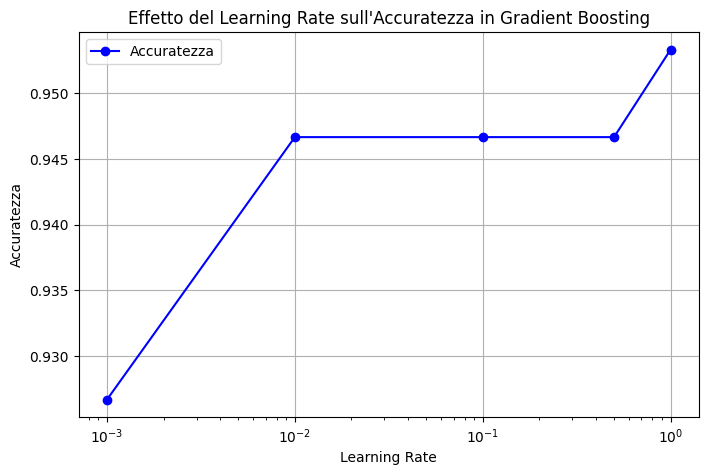

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 📌 Generiamo un dataset di esempio
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, 
                           n_redundant=2, random_state=42)

# 📌 Suddivisione in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Testiamo diversi learning rate
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
accuracies = []

for lr in learning_rates:
    gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=lr, max_depth=3, random_state=42)
    gbc.fit(X_train, y_train)
    accuracies.append(gbc.score(X_test, y_test))

# 📌 Creazione del grafico
plt.figure(figsize=(8,5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b', label="Accuratezza")
plt.xscale("log")  # Scala logaritmica per evidenziare differenze tra valori piccoli
plt.xlabel("Learning Rate")
plt.ylabel("Accuratezza")
plt.title("Effetto del Learning Rate sull'Accuratezza in Gradient Boosting")
plt.grid(True)
plt.legend()
plt.show()

# 📌 **Principal Component Analysis (PCA)**
---

## 📌 **1. Cos'è il PCA?**
Il **Principal Component Analysis (PCA)** è una tecnica di **riduzione della dimensionalità** utilizzata per:
- Eliminare feature ridondanti o altamente correlate.
- Migliorare la velocità di addestramento del modello.
- Visualizzare dati ad alta dimensione in 2D o 3D.
- Ridurre l'overfitting rimuovendo feature meno informative.

📌 **Obiettivo**:  
PCA trova una nuova base di coordinate dove **le feature sono non correlate** e ordinate in modo che la prima dimensione abbia la massima varianza, la seconda la seconda massima varianza, ecc.

---

## 📌 **2. Funzionamento Matematico del PCA**
PCA trasforma un dataset $ X $ di $ n $ campioni e $ p $ feature in un nuovo sistema di coordinate basato sulle **Componenti Principali**.  
Il processo avviene in questi passi:

### 🔹 **1. Centrare i Dati (Sottrarre la Media)**
Prima di applicare il PCA, normalizziamo i dati sottraendo la media per ogni feature:

$$
X_{\text{centrato}} = X - \mu
$$

Dove:
- $ X $ è il dataset originale.
- $ \mu $ è la media di ogni colonna (feature).

---

### 🔹 **2. Calcolare la Matrice di Covarianza**
La matrice di covarianza misura la relazione tra le feature:

$$
\Sigma = \frac{1}{n} X_{\text{centrato}}^T X_{\text{centrato}}
$$

Dove:
- $ \Sigma $ è una matrice $ p \times p $ che rappresenta la covarianza tra le feature.

Se due feature hanno **alta covarianza**, significa che contengono informazioni ridondanti.

---

### 🔹 **3. Ottenere Autovalori e Autovettori**
PCA calcola gli **autovalori** e **autovettori** della matrice di covarianza:

$$
\Sigma v = \lambda v
$$

Dove:
- $ v $ sono gli **autovettori**, che rappresentano le **nuove direzioni principali** dei dati.
- $ \lambda $ sono gli **autovalori**, che indicano **quanta varianza** è spiegata da ogni componente.

Gli autovettori ordinati dagli autovalori ci danno le **Componenti Principali**.

---

### 🔹 **4. Selezionare il Numero di Componenti**
Per scegliere il numero di componenti, usiamo la **varianza spiegata**:

$$
\text{Varianza spiegata} = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}
$$

La somma cumulativa della varianza ci aiuta a decidere **quante componenti mantenere**.

📌 **Regola pratica**:
- Se vogliamo conservare **95% della varianza**, scegliamo il numero minimo di componenti per cui:

$$
\sum_{i=1}^{k} \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j} \geq 0.95
$$

Nella formula della **varianza spiegata**:

$$
\text{Varianza spiegata} = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}
$$

- **$ p $** è il numero totale di feature nel dataset originale.
- **$ j $** è l'indice che scorre tutte le feature per calcolare la somma degli autovalori.
- **$ \lambda_i $** rappresenta l'autovalore associato alla componente principale $ i $, indicando quanta varianza spiega quella componente.

La somma cumulativa della varianza aiuta a determinare **quante componenti mantenere** senza perdere troppa informazione.

---

### 🔹 **5. Proiettare i Dati nel Nuovo Spazio**
I dati originali vengono trasformati nel nuovo spazio delle Componenti Principali:

$$
X_{\text{PCA}} = X_{\text{centrato}} V_k
$$

Dove:
- $ V_k $ contiene i **primi $ k $ autovettori** selezionati.

Ora il dataset ha meno dimensioni, ma mantiene **la massima informazione possibile**.

---

## 📌 **3. Esempio Pratico con PCA in Python**
Vediamo un esempio con `PCA` di Scikit-Learn.

```python



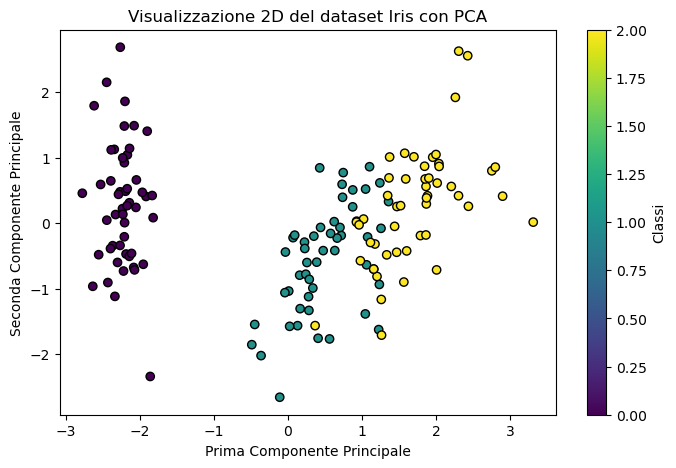

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 📌 Carichiamo il dataset Iris
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# 📌 Normalizziamo i dati (PCA funziona meglio con dati standardizzati)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Applichiamo PCA mantenendo 2 componenti principali
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 📌 Visualizziamo i dati trasformati
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Prima Componente Principale")
plt.ylabel("Seconda Componente Principale")
plt.title("Visualizzazione 2D del dataset Iris con PCA")
plt.colorbar(label="Classi")
plt.show()

# 📌 **Autovalori e Autovettori: Concetti Fondamentali**
Gli **autovalori** e **autovettori** sono concetti fondamentali dell'*algebra lineare* e vengono utilizzati in algoritmi come **PCA** per trovare le direzioni principali dei dati.

---

## 📌 **1. Definizione Matematica**
Per una matrice quadrata $ A $, un **autovettore** $ v $ e il suo **autovalore** $ \lambda $ soddisfano la seguente equazione:

$$
A v = \lambda v
$$

Dove:
- **$ A $** è una matrice quadrata di dimensione $ n \times n $.
- **$ v $** è un **autovettore**, ovvero un vettore **non nullo** che, moltiplicato per la matrice $ A $, **non cambia direzione**, ma solo lunghezza.
- **$ \lambda $** è l'**autovalore**, ovvero il fattore di scalatura dell'autovettore.

---

## 📌 **2. Significato Intuitivo**
- Un **autovettore** è una direzione nello spazio che **rimane inalterata** dopo la trasformazione rappresentata dalla matrice $ A $.
- L'**autovalore** ci dice **quanto** l'autovettore viene scalato (ingrandito o ridotto).

📌 **Esempio semplice**:  
Se $ A $ rappresenta una trasformazione geometrica (come una rotazione o uno stiramento), gli **autovettori** sono le direzioni che **non cambiano** sotto questa trasformazione, e gli **autovalori** indicano di **quanto vengono scalate** queste direzioni.

---

## 📌 **3. Applicazione nel PCA**
Nel **PCA (Principal Component Analysis)**:
- Gli **autovettori** della **matrice di covarianza** rappresentano le **nuove direzioni principali** dei dati.
- Gli **autovalori** indicano **quanta varianza** è spiegata da ciascuna direzione.

💡 **In sintesi**, gli autovalori e autovettori ci aiutano a trovare le direzioni più importanti nei dati e a ridurre la dimensionalità mantenendo la massima informazione possibile.


# 📌 **Esempio pratico di Autovalori e Autovettori**

Ecco un esempio pratico di **autovalori e autovettori** usando la matrice:

$$
A =
\begin{bmatrix}
3 & 1 \\
1 & 3
\end{bmatrix}
$$

Dopo il calcolo, otteniamo:

- **Autovalori**:  
  $$ \lambda_1 = 4, \quad \lambda_2 = 2 $$

- **Autovettori**:

  $$
  v_1 =
  \begin{bmatrix}
  0.707 \\
  0.707
  \end{bmatrix}
  , \quad
  v_2 =
  \begin{bmatrix}
  -0.707 \\
  0.707
  \end{bmatrix}
  $$

---

## 📌 **Cosa significa?**
- La matrice $ A $ trasforma i vettori nello spazio, ma **i due autovettori** rimangono **nella stessa direzione**, scalati rispettivamente di **4** e **2**.
- L'**autovalore più grande** ($ \lambda_1 = 4 $) indica la **direzione con la maggiore variazione** dei dati.
- Questo è utile nel **PCA** per trovare le componenti principali e ridurre la dimensionalità del dataset.

💡 **In sintesi, gli autovalori ci dicono quanta varianza è presente in una direzione, mentre gli autovettori ci indicano le direzioni principali dei dati.** 🚀


# 📌 **Come PCA Utilizza Autovalori e Autovettori**
---

## 📌 **1. Ruolo degli Autovalori e Autovettori nel PCA**
Nel **Principal Component Analysis (PCA)**, vogliamo trovare le **direzioni principali** dei dati, ovvero gli **assi lungo cui la varianza è massima**.  
Per fare ciò, **calcoliamo gli autovalori e gli autovettori** della matrice di covarianza.

📌 **Obiettivo del PCA**:
- Gli **autovettori** definiscono le **nuove direzioni** dello spazio trasformato.
- Gli **autovalori** indicano **quanta varianza** è spiegata da ogni autovettore.

---

## 📌 **2. Selezione delle Componenti Principali**
Dopo aver calcolato gli **autovalori** \( \lambda \) e gli **autovettori** \( v \), il PCA segue questa strategia:

1️⃣ **Ordiniamo gli autovalori in ordine decrescente**:
   - L'autovalore più grande \( \lambda_1 \) corrisponde alla direzione con **la massima varianza** nei dati.
   - L'autovalore più piccolo indica **direzioni meno importanti**.

2️⃣ **Selezioniamo solo i primi $ k $ autovettori** (quelli con gli autovalori più grandi):
   - Manteniamo solo le **direzioni con più varianza**.
   - Eliminando gli autovettori con autovalori piccoli, **riduciamo la dimensionalità** senza perdere troppa informazione.

3️⃣ **Proiettiamo i dati nel nuovo spazio**:
   - Moltiplichiamo il dataset originale per la matrice degli autovettori selezionati:

   $$
   X_{\text{PCA}} = X_{\text{centrato}} V_k
   $$

   Dove:
   - \( X_{\text{centrato}} \) è il dataset normalizzato.
   - \( V_k \) è la matrice contenente i primi \( k \) autovettori selezionati.

---

## 📌 **3. Eliminazione delle Componenti Minori**
Se una **componente principale** ha un autovalore molto piccolo, significa che quella direzione ha **poca varianza** nei dati.  
📌 **Conclusione**: Possiamo **eliminare** quelle componenti senza perdere informazioni significative.

### 🔹 **Esempio pratico**
Se nel dataset originale abbiamo **10 feature**, ma scopriamo che **le prime 3 componenti principali spiegano il 95% della varianza**, possiamo ridurre il dataset da **10 a 3 dimensioni**, eliminando le feature meno significative.

---

## 📌 **4. Scelta del Numero di Componenti Principali**
Per scegliere quante componenti mantenere, utilizziamo la **varianza spiegata cumulativa**:

$$
\sum_{i=1}^{k} \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j} \geq 0.95
$$

📌 **Regola pratica**:
- Se vogliamo **mantenere il 95% della varianza**, scegliamo il numero minimo di componenti \( k \) per cui la varianza spiegata cumulativa raggiunge almeno il **95%**.

💡 **In sintesi, nel PCA cerchiamo gli autovettori corrispondenti agli autovalori più grandi perché rappresentano le direzioni con più varianza, e scartiamo quelli con autovalori più piccoli perché apportano meno informazione ai dati.** 🚀
